# Занятие 4
# Алгебра

## Решение систем линейных алгебраических уравнений (СЛАУ)
### Задание 1.

Дана СЛАУ с параметром:
$$
\left\{
\begin{matrix}
(2+c)x+3y-z=5\\
3x-2y+z=2\\
x+y-(2c-1)z=0
\end{matrix}
\right.
$$
Решить по формулам Крамера при всех значениях параметра, при которых это возможно. Проверить с помощью linsolve и подстановкой. Указать, при каких значениях параметра невозможно использовать формулы Крамера.

In [1]:
import sympy
from sympy import *
init_printing(use_unicode=False, wrap_line=False, no_global=True)

Решение СЛАУ с помощью формулы Крамера:


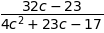

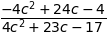

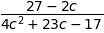

Проверка linsolve:


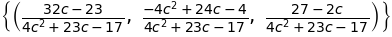

Проверка подстановкой:


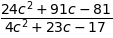

При данных значениях невозможно использовать формулы Крамера


In [2]:
x, y, z, c = symbols("x, y, z, c")
A = Matrix([[2 + c, 3, -1], [3, -2, 1], [1, 1, -2 * c + 1]])
b = Matrix([[5], [2], [0]])
Ax = ones(3, 3)
Ay = ones(3, 3)
Az = ones(3, 3)
Ax[:, :] = A
Ay[:, :] = A
Az[:, :] = A
Ax[:, 0] = b
Ay[:, 1] = b
Az[:, 2] = b
print("Решение СЛАУ с помощью формулы Крамера:")
x = simplify(Ax.det() / A.det())
y = simplify(Ay.det() / A.det())
z = simplify(Az.det() / A.det())
display(x,y,z)
print("Проверка linsolve:")
display(linsolve((A, b)))
print("Проверка подстановкой:")
f1 = (2+c)*x + 2*y - z
f2 = 3 * x - 2 * y + z
f3 = x + y - (2*c -1) * z 
display(simplify(f1), simplify(f2), simplify(f3))
print("При данных значениях невозможно использовать формулы Крамера")
display(solveset(A.det(),c,domain=S.Reals))

### Задание 2.
Решить СЛАУ AX=b при всех значениях параметра, пользуясь rref,  проверить linsolve и подстановкой:
$$
A=\left(
\begin{matrix}
1-a&2&a&3&1-a&0\\
-2&a+1&-1&0&1&a+1\\a-3&a-1&-a-1&2&1&-a
\end{matrix}
\right)
\qquad B=\left(
\begin{matrix}
1\\-2\\3
\end{matrix}
\right)
$$

[       / 2        \        / 2    \        2                     ]
[      -\a  + a + 2/      2*\a  + 4/   - 6*a  + a + 7    13*a - 7 ]
[1  0  --------------  0  ----------   --------------   ----------]
[           2               / 2    \        2             / 2    \]
[          a  - 5         5*\a  - 5/     5*a  - 25      5*\a  - 5/]
[                                                                 ]
[                                        2                        ]
[         1 - 3*a         9*(a - 1)   5*a  - 12*a - 11  36/5 - 2*a]
[0  1     -------      0  ----------  ----------------  ----------]
[           2               / 2    \       / 2    \        2      ]
[          a  - 5         5*\a  - 5/     5*\a  - 5/       a  - 5  ]
[                                                                 ]
[                           1   a          2*a   1                ]
[0  0        0         1    - - -        - --- - -         6/5    ]
[                           5   5           5   

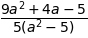

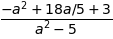

Подстановка:


Linsolve


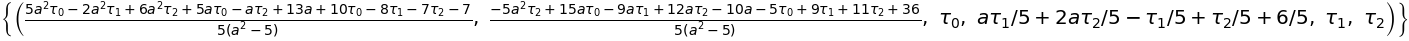

In [14]:
a, s = symbols('a s')
# СЛАУ
Ab = Matrix([[1 - a, 2, a, 3, 1 - a, 0, 1], [-2, a + 1, -1, 0, 1, a + 1, -2], [a - 3, a - 1, -a - 1, 2, 1, -a, 3]])
lins = Ab
A = Matrix([[1 - a, 2, a, 3, 1 - a, 0], [-2, a + 1, -1, 0, 1, a + 1], [a - 3, a - 1, -a - 1, 2, 1, -a]])
b = Matrix([[1], [-2], [3]]) #
Ab, indices = Ab.rref()
Ab = simplify(Ab)
A, sindeces = simplify(A.rref())
display(Ab)
s = 0
l = 0
res = [0, 0, 0]
for i in indices:
    for j in range(i, 6):
        s = s - Ab[l, j+1]
    res[l] = simplify(s + Ab[l,6])
    display(res[l])
    s = 0
    l += 1


print("Подстановка:")
display(simplify(res[0] + A[0,2] + A[0,4] + A[0,5]))
display(simplify(res[1] + A[1,2] + A[1,4] + A[1,5]))
display(simplify(res[2] + A[2,4] + A[2,5]))
print("Linsolve")
display(simplify(linsolve((lins))))

### Задание 3.
Найти фундаментальную систему решений однородной СЛАУ с матрицей А при всех значениях параметра.
Проверить линейную независимость векторов ФСР и удостовериться, что они являются решениями СЛАУ.
$$
A=\left(
\begin{matrix}
a&2&a&3&a&4\\2&a&3&a&1&a\\a&-a&1&2&-a&a
\end{matrix}
\right)
$$

In [16]:
print("ФСР:")
A = Matrix([[a, 2, a, 3, a, 4], [2, a, 3, a, 1, a], [a, -a, 1, 2, -a, a]])
nspace = simplify(A.nullspace())
for i in range( len(nspace)):
    nspace[i] = simplify(nspace[i])
display(nspace)
print("Проверка решений")
for i in range(len(nspace)):
    display(simplify(A*nspace[i]))
print("Проверка лнз")
A.rank()

ФСР:


 [   3      2            ]                         [       / 2     \   ] 
 [- a  - 2*a  + 10*a + 12]  [ 3      2          ]  [  -2*a*\a  - 10/   ] 
 [-----------------------]  [a  + 3*a  - 6*a - 2]  [-------------------] 
 [   3      2            ]  [-------------------]  [ 3      2          ] 
 [  a  - 2*a  - 6*a + 4  ]  [ 3      2          ]  [a  - 2*a  - 6*a + 4] 
 [                       ]  [a  - 2*a  - 6*a + 4]  [                   ] 
 [     3    2            ]  [                   ]  [     3             ] 
 [  - a  + a  + 7*a - 6  ]  [    a*(3*a - 1)    ]  [  - a  + 12*a - 8  ] 
 [  -------------------  ]  [-------------------]  [-------------------] 
 [   3      2            ]  [ 3      2          ]  [ 3      2          ] 
 [  a  - 2*a  - 6*a + 4  ]  [a  - 2*a  - 6*a + 4]  [a  - 2*a  - 6*a + 4] 
[[                       ], [                   ], [                   ]]
 [       2               ]  [   -a*(2*a - 3)    ]  [   2*a*(a - 3)     ] 
 [      a  - a - 4       ]  [   ------

Проверка решений


[0]
[ ]
[0]
[ ]
[0]

[0]
[ ]
[0]
[ ]
[0]

[0]
[ ]
[0]
[ ]
[0]

Проверка лнз


In [26]:
#ИЗ
#c+2   4   4 2 9
#3    c−11 7 8 8 
#1−c  c−7  3 6 −1  
c = symbols("c")
matr = Matrix([[c + 2, 4, 4, 2, 9], [3, c - 11, 7, 8, 8], [1 - c, c - 7, 3, 6, -1]])
nspace = matr.nullspace()
for i in range(len(nspace)):
    nspace[i] = simplify(nspace[i])
print("Исходная матрица")
display(matr)
p, q = simplify(matr.rref())
print("Канонический вид")
display(p)
print("ФСР")
display(nspace)
# при с = -3.5, знаменатель равен 0
print("Проверка решений")
for i in range(len(nspace)):
    display(simplify((p*nspace[i])))

Исходная матрица


[c + 2    4     4  2  9 ]
[                       ]
[  3    c - 11  7  8  8 ]
[                       ]
[1 - c  c - 7   3  6  -1]

Канонический вид


[             -18         31   ]
[1  0  0    -------    ------- ]
[           7*c + 2    7*c + 2 ]
[                              ]
[0  1  0       0          0    ]
[                              ]
[         2*(4*c + 5)  8*c - 11]
[0  0  1  -----------  --------]
[           7*c + 2    7*c + 2 ]

ФСР


 [     18     ]  [  -31   ] 
 [  -------   ]  [------- ] 
 [  7*c + 2   ]  [7*c + 2 ] 
 [            ]  [        ] 
 [     0      ]  [   0    ] 
 [            ]  [        ] 
[[-(8*c + 10) ], [11 - 8*c]]
 [------------]  [--------] 
 [  7*c + 2   ]  [7*c + 2 ] 
 [            ]  [        ] 
 [     1      ]  [   0    ] 
 [            ]  [        ] 
 [     0      ]  [   1    ] 

Проверка решений


[0]
[ ]
[0]
[ ]
[0]

[0]
[ ]
[0]
[ ]
[0]